In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.
Out[3]: True

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import pandas as pd
pd.options.mode.chained_assignment = None

import plotly.express as px
import numpy as np

In [0]:
data = pd.read_csv("/dbfs/FileStore/amazon_reviews_us_Mobile_Electronics_v1_00.csv", low_memory=False)
data.head()

Out[5]:

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefgÂ® FBI Covert Acoustic Tube Earpiece...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data = data[['review_body','star_rating']]
data.dropna(inplace=True)
data['star_rating'] = data['star_rating'].astype(int)

In [0]:
### Over sampling to balance Dataset

In [0]:
data['star_rating'].value_counts()

Out[7]: 5 52198
4 18063
1 17572
3 9720
2 7298
Name: star_rating, dtype: int64

In [0]:
data['len'] = data['review_body'].apply(lambda s : len(s))

In [0]:
data  = data[data.len >1]

Out[10]:

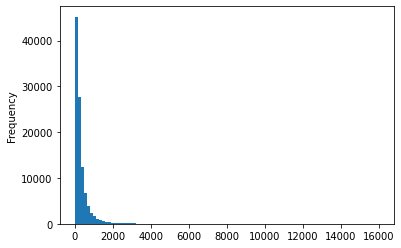

<AxesSubplot:ylabel='Frequency'>

In [0]:
data['len'].plot.hist(bins=100)

In [0]:
data.len.quantile(0.9)

Out[11]: 728.0

In [0]:
data.star_rating.value_counts()

Out[12]: 5 52186
4 18056
1 17572
3 9719
2 7298
Name: star_rating, dtype: int64

### Cleaning

In [0]:
import copy
df = copy.deepcopy(data)

In [0]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x
def remove_punctuation(x):
  new_string = re.sub(r'[^\w\s]', '', x)
  return new_string
  

In [0]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)
# Usage
replace_contractions("this's a text with contraction")

Out[15]: 'this is a text with contraction'

In [0]:
# lower the text
df["review_body"] = df["review_body"].apply(lambda x: x.lower())

# Clean the text
df["review_body"] = df["review_body"].apply(lambda x: clean_text(x))

# Clean numbers
df["review_body"] = df["review_body"].apply(lambda x: clean_numbers(x))

# Clean Contractions
df["review_body"] = df["review_body"].apply(lambda x: replace_contractions(x))

df["review_body"] = df["review_body"].apply(lambda x: remove_punctuation(x))

In [0]:
count_df = df[['review_body','star_rating']].groupby('review_body').aggregate({'star_rating':'count'}).reset_index().sort_values('star_rating',ascending=False)
count_df.head(120)

Out[17]:

,review_body,star_rating
14751,good,277
98629,works great,218
16607,great,203
11513,excellent,162
18169,great product,132
...,...,...
93589,very nice product,5
100615,yes,5
19513,great value,5
52171,item delivered on time was as described,5


In [0]:
px.bar(count_df[count_df['star_rating']>4],x='review_body',y='star_rating')

Out[18]:

In [0]:
df['len'].max(),df['len'].min(), df['len'].mean()

Out[19]: (16009, 2, 342.49720025564955)

In [0]:
df['len'].describe()

Out[20]: count 104831.000000
mean 342.497200
std 526.515147
min 2.000000
25% 115.000000
50% 190.000000
75% 381.500000
max 16009.000000
Name: len, dtype: float64

Out[21]:

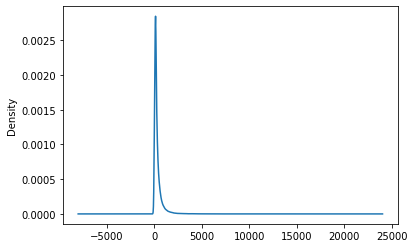

<AxesSubplot:ylabel='Density'>

In [0]:
df['len'].plot.kde()

In [0]:
df.drop("len",inplace = True, axis=1)

In [0]:
df.star_rating.value_counts()

Out[22]: 5 52186
4 18056
1 17572
3 9719
2 7298
Name: star_rating, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=42,stratify=df['star_rating'])
print('Research title sample:', train['review_body'].iloc[0])
print('Conference of this paper:', train['review_body'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)
# from sklearn.model_selection import train_test_split
# train_X, test_X, train_y, test_y = train_test_split(df['review_body'], df['star_rating'],
#                                                     stratify=df['review_body'], 
#                                                     test_size=0.25)

Research title sample: i had purchased an identical flashlight several years ago and decided to try to find a spare one here in my local area but could not so imagine when i found this on amazon i definitely love the flashlight and will definitely order one again should something go wrong with this one which given the fact that the flashlight is so well made that probably will not happen anytime sooni will definitely come back for more love the way it is made and the material it is made out of
Conference of this paper: i had purchased an identical flashlight several years ago and decided to try to find a spare one here in my local area but could not so imagine when i found this on amazon i definitely love the flashlight and will definitely order one again should something go wrong with this one which given the fact that the flashlight is so well made that probably will not happen anytime sooni will definitely come back for more love the way it is made and the material it is made out of
Training Data Shape: (70236, 3)
Testing Data Shape: (34595, 3)

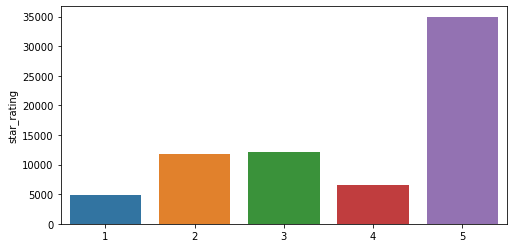

In [0]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['star_rating'].unique(), y=train['star_rating'].value_counts())
plt.show()

In [0]:
import spacy

from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error

In [0]:
%sh
python -m spacy download en_core_web_sm

Collecting en-core-web-sm==3.1.0
 Downloading https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
Requirement already satisfied: spacy<3.2.0,>=3.1.0 in /databricks/python3/lib/python3.8/site-packages (from en-core-web-sm==3.1.0) (3.1.3)
Requirement already satisfied: murmurhash<1.1.0,>=0.28.0 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (1.0.5)
Requirement already satisfied: pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (1.8.2)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (52.0.0)
Requirement already satisfied: tqdm<5.0.0,>=4.38.0 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (4.59.0)
Requirement already satisfied: typer<0.5.0,>=0.3.0 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (0.3.2)
Requirement already satisfied: pathy>=0.3.5 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (0.6.0)
Requirement already satisfied: requests<3.0.0,>=2.13.0 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (2.25.1)
Requirement already satisfied: preshed<3.1.0,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (3.0.5)
Requirement already satisfied: srsly<3.0.0,>=2.4.1 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (2.4.1)
Requirement already satisfied: wasabi<1.1.0,>=0.8.1 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (0.8.2)
Requirement already satisfied: jinja2 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (2.11.3)
Requirement already satisfied: cymem<2.1.0,>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (2.0.5)
Requirement already satisfied: numpy>=1.15.0 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (1.19.2)
Requirement already satisfied: spacy-legacy<3.1.0,>=3.0.8 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (3.0.8)
Requirement already satisfied: packaging>=20.0 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (20.9)
Requirement already satisfied: catalogue<2.1.0,>=2.0.6 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (2.0.6)
Requirement already satisfied: thinc<8.1.0,>=8.0.9 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (8.0.9)
Requirement already satisfied: blis<0.8.0,>=0.4.0 in /databricks/python3/lib/python3.8/site-packages (from spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (0.7.4)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging>=20.0->spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (2.4.7)
Requirement already satisfied: smart-open<6.0.0,>=5.0.0 in /databricks/python3/lib/python3.8/site-packages (from pathy>=0.3.5->spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (5.2.0)
Requirement already satisfied: typing-extensions>=3.7.4.3 in /databricks/python3/lib/python3.8/site-packages (from pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4->spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (4.1.1)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests<3.0.0,>=2.13.0->spacy<3.2.0,>=3.1.0->en-core-web-sm==3.1.0) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/

In [0]:
import spacy
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()

In [0]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]#count number of occurences of each word


In [0]:
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [0]:
# data
train1 = train['review_body'].tolist()
labelsTrain1 = train['star_rating'].tolist()
test1 = test['review_body'].tolist()
labelsTest1 = test['star_rating'].tolist()
# train
pipe.fit(train1, labelsTrain1)
# test
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 10)
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)
vocab = vectorizer.get_feature_names()
for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

accuracy: 0.49781760369995665
Top 10 features used to predict: 
Class 1 best: 
(-0.004648846168602894, '')
Class 2 best: 
(-0.004648846168602894, '')